In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input/20000-customers-reviews-on-banks'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/20000-customers-reviews-on-banks/Banks.csv


In [2]:
df = pd.read_csv("/kaggle/input/20000-customers-reviews-on-banks/Banks.csv")

# Data Cleaning

In [3]:
df.head()

,author,date,location,bank,star,text,like
0,Kyle,31.08.2023,"Magnolia, TX",merrick_bank,5,Very easy to use to view statements and make o...,NaN
1,Julicia,23.08.2023,"Columbus, GA",merrick_bank,5,Merrick Bank has always been good to me for bu...,NaN
2,Karen,2.06.2023,"Marrero, LA",merrick_bank,4,Times are tough for everyone and I have worked...,3.0
3,Brent,29.03.2023,"Moultrie, GA",merrick_bank,5,I can not asked for a better Credit Card Compa...,3.0
4,Sharon,23.11.2022,"Burnham, IL",merrick_bank,5,Updated on 02/10/2023: I was happy to sign for...,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19271 entries, 0 to 19270
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   author    19269 non-null  object 
 1   date      19271 non-null  object 
 2   location  19271 non-null  object 
 3   bank      19271 non-null  object 
 4   star      19271 non-null  int64  
 5   text      19181 non-null  object 
 6   like      17769 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.0+ MB


In [5]:
df.isna().sum()

author         2
date           0
location       0
bank           0
star           0
text          90
like        1502
dtype: int64

In [6]:
df.dropna(subset=['author', 'text'], inplace=True)

# Replacing NaN values in 'like' column with 0
df['like'].fillna(0, inplace=True)

In [7]:
# GOOD TO GO
df.isna().sum()

author      0
date        0
location    0
bank        0
star        0
text        0
like        0
dtype: int64

In [8]:
# CLEAR
df.head()

,author,date,location,bank,star,text,like
0,Kyle,31.08.2023,"Magnolia, TX",merrick_bank,5,Very easy to use to view statements and make o...,0.0
1,Julicia,23.08.2023,"Columbus, GA",merrick_bank,5,Merrick Bank has always been good to me for bu...,0.0
2,Karen,2.06.2023,"Marrero, LA",merrick_bank,4,Times are tough for everyone and I have worked...,3.0
3,Brent,29.03.2023,"Moultrie, GA",merrick_bank,5,I can not asked for a better Credit Card Compa...,3.0
4,Sharon,23.11.2022,"Burnham, IL",merrick_bank,5,Updated on 02/10/2023: I was happy to sign for...,3.0


In [9]:
# Lets convert the 'date' column to a datetime data type
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [10]:
# DONE 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19179 entries, 0 to 19270
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   author    19179 non-null  object        
 1   date      19179 non-null  datetime64[ns]
 2   location  19179 non-null  object        
 3   bank      19179 non-null  object        
 4   star      19179 non-null  int64         
 5   text      19179 non-null  object        
 6   like      19179 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [11]:
# Now Lets split 'date' column into day, month, and year into separate columns
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [12]:
# Well we can drop date column now, as we dont need that anymore
df.drop(columns=['date'], inplace=True)

In [13]:
# GREAT
df.head()

,author,location,bank,star,text,like,day,month,year
0,Kyle,"Magnolia, TX",merrick_bank,5,Very easy to use to view statements and make o...,0.0,31,8,2023
1,Julicia,"Columbus, GA",merrick_bank,5,Merrick Bank has always been good to me for bu...,0.0,23,8,2023
2,Karen,"Marrero, LA",merrick_bank,4,Times are tough for everyone and I have worked...,3.0,2,6,2023
3,Brent,"Moultrie, GA",merrick_bank,5,I can not asked for a better Credit Card Compa...,3.0,29,3,2023
4,Sharon,"Burnham, IL",merrick_bank,5,Updated on 02/10/2023: I was happy to sign for...,3.0,23,11,2022


# EDA

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19179 entries, 0 to 19270
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   author    19179 non-null  object 
 1   location  19179 non-null  object 
 2   bank      19179 non-null  object 
 3   star      19179 non-null  int64  
 4   text      19179 non-null  object 
 5   like      19179 non-null  float64
 6   day       19179 non-null  int32  
 7   month     19179 non-null  int32  
 8   year      19179 non-null  int32  
dtypes: float64(1), int32(3), int64(1), object(4)
memory usage: 1.2+ MB


# How many reviews are there for each bank?

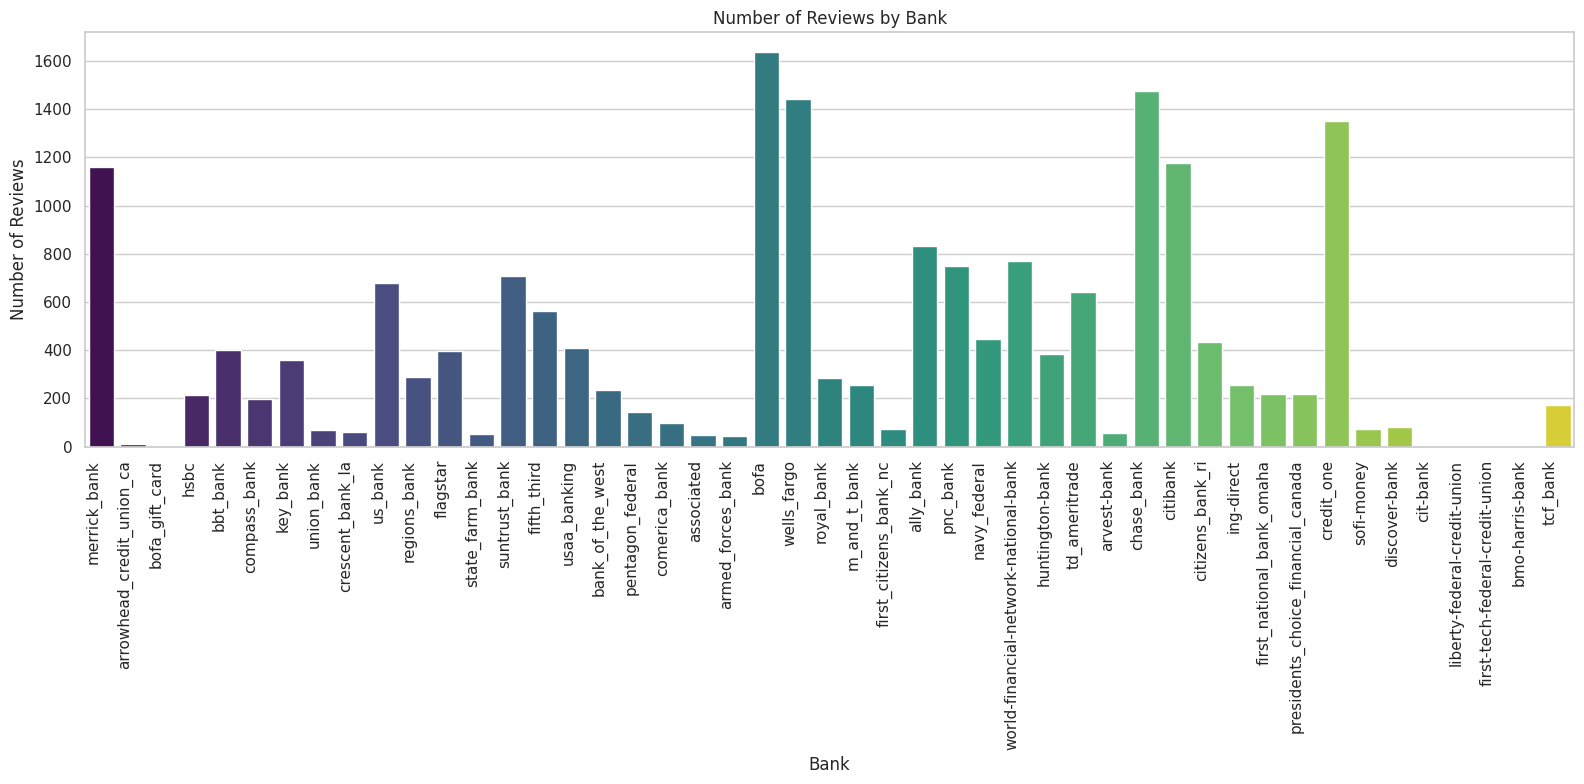

In [16]:
plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=df, x="bank", palette="viridis")
plt.title("Number of Reviews by Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.tight_layout()

plt.show()

# What is the distribution of star ratings?

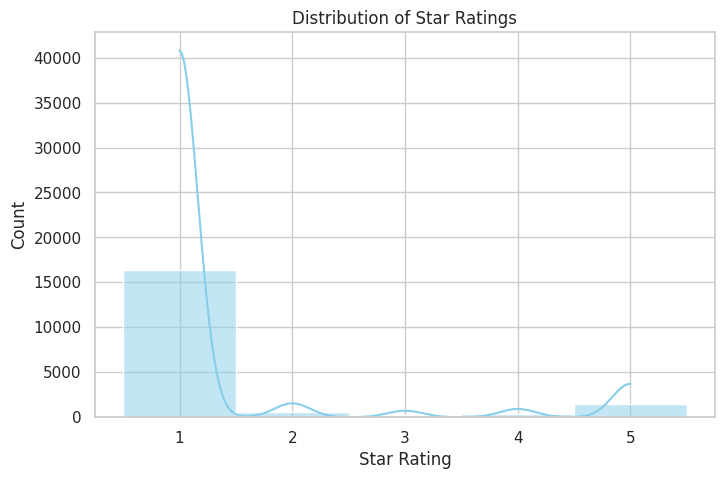

In [17]:
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x="star", discrete=True, kde=True, color="skyblue")
plt.title("Distribution of Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Count")

plt.show()

# 
#
#
#
#
#

# How do star ratings vary by the month and year of the review?

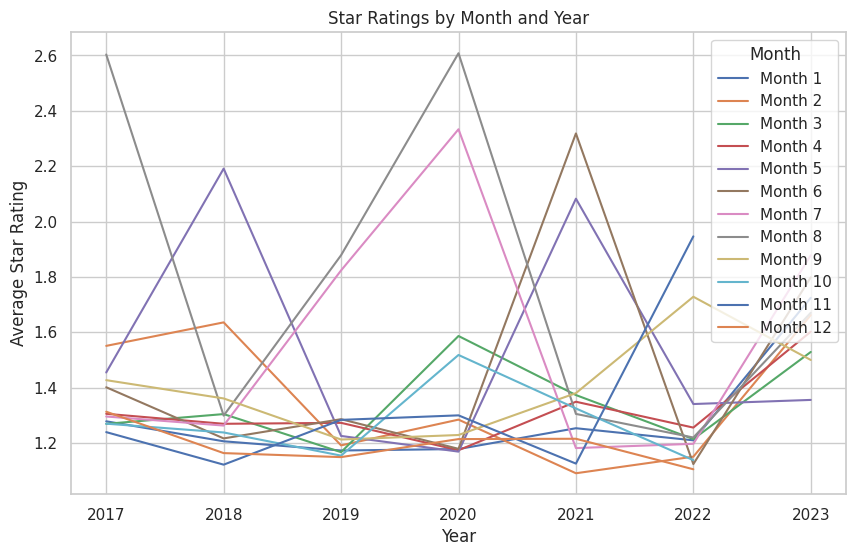

In [18]:
avg_star_ratings = df.groupby(['year', 'month'])['star'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.title("Star Ratings by Month and Year")
plt.xlabel("Year")
plt.ylabel("Average Star Rating")

# Here Creating a line for each month using a loop
for month, group in avg_star_ratings.groupby('month'):
    plt.plot(group['year'], group['star'], label=f"Month {month}")

plt.legend(title="Month", loc="upper right")
plt.grid(True)

plt.show()

# 
#
#
#

# What are the most common locations for reviews?

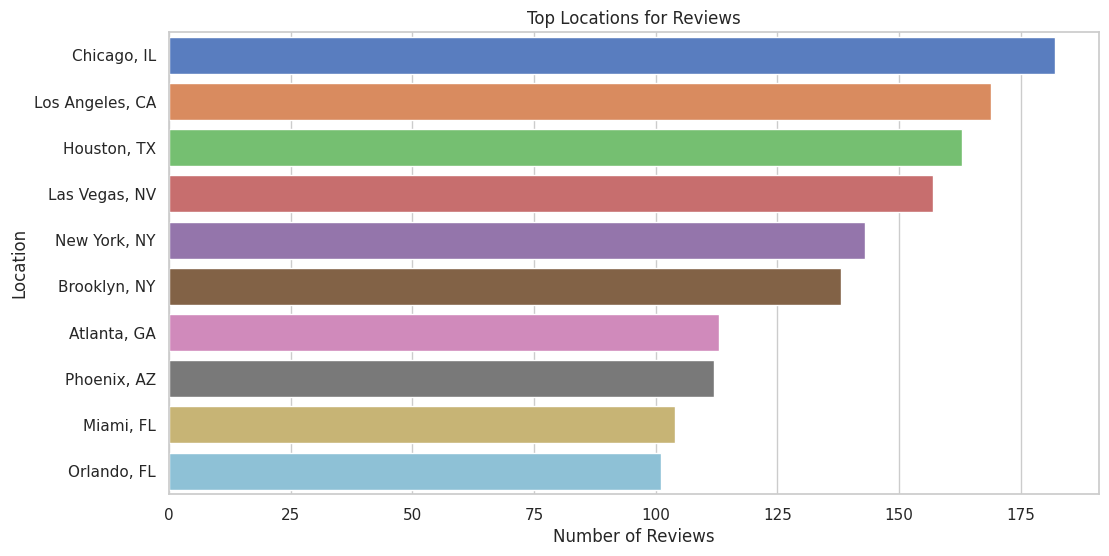

In [19]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
top_locations = df["location"].value_counts().head(10)
sns.barplot(x=top_locations, y=top_locations.index, palette="muted")
plt.title("Top Locations for Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Location")

plt.show()

# 
#
#
#
#
#
#
#

# How does the number of likes vary with star ratings?

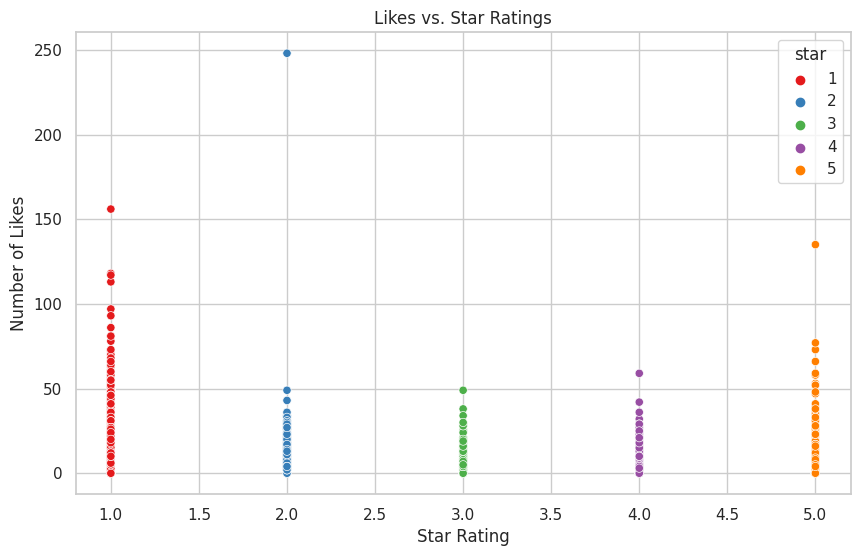

In [20]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df, x="star", y="like", hue="star", palette="Set1")
plt.title("Likes vs. Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Number of Likes")

plt.show()

# 
#
#
#
#
#

# Who are the top authors by the number of reviews they've written?

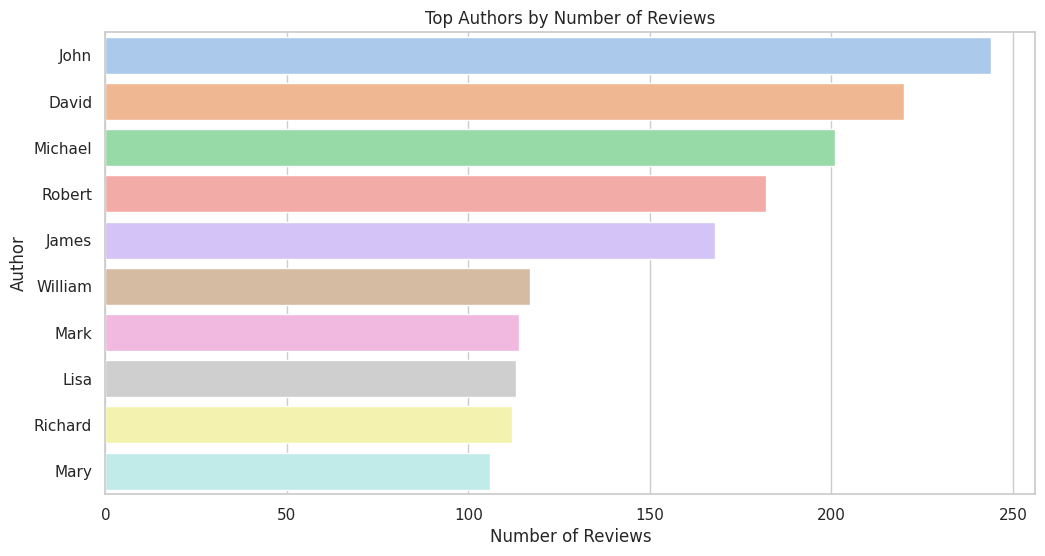

In [21]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
top_authors = df["author"].value_counts().head(10)
sns.barplot(x=top_authors, y=top_authors.index, palette="pastel")
plt.title("Top Authors by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Author")

plt.show()

# 
#
#
#
#
#
#

# What is the distribution of reviews by day of the month?

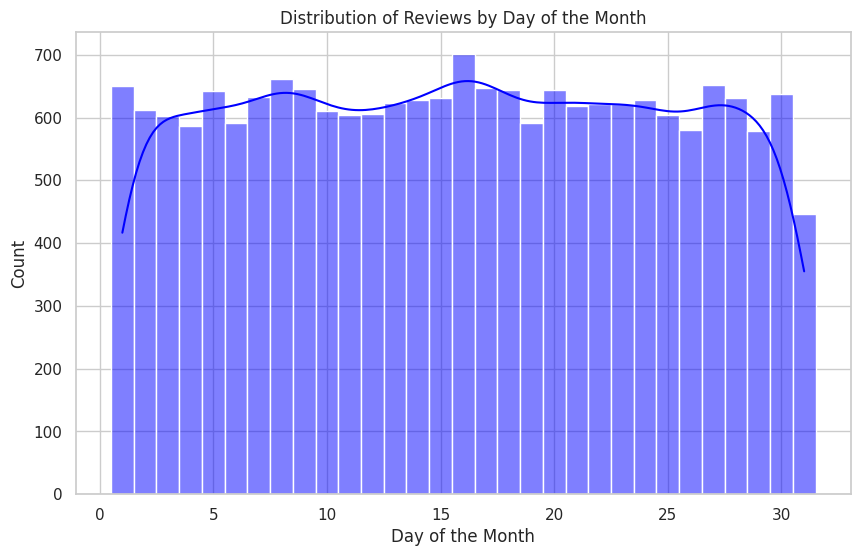

In [22]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x="day", discrete=True, kde=True, color="blue")
plt.title("Distribution of Reviews by Day of the Month")
plt.xlabel("Day of the Month")
plt.ylabel("Count")

plt.show()

#
#
#
#
#
#

# How have the number of reviews changed over the years?

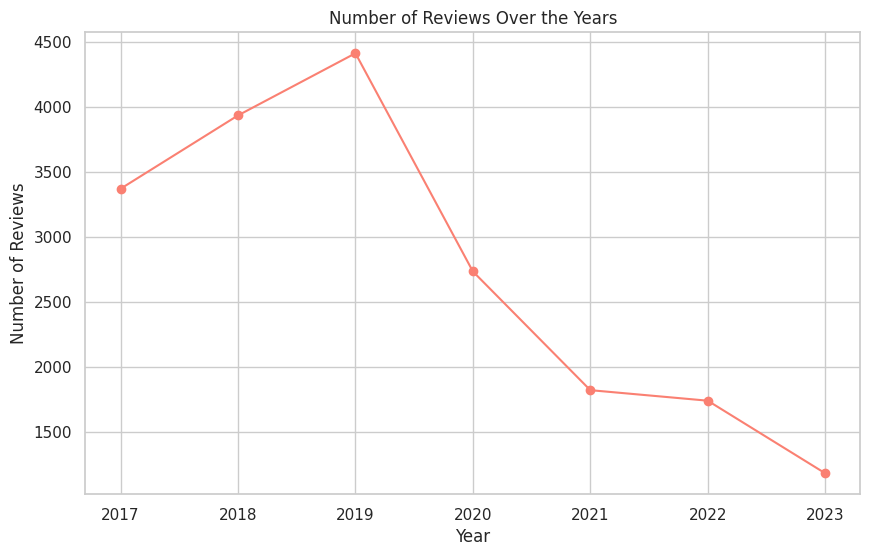

In [23]:
reviews_by_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(reviews_by_year.index, reviews_by_year.values, marker='o', color='salmon')
plt.title("Number of Reviews Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")

plt.show()

# How does the distribution of star ratings differ for each bank?
### TOP BANKS WITH 5 STARS 

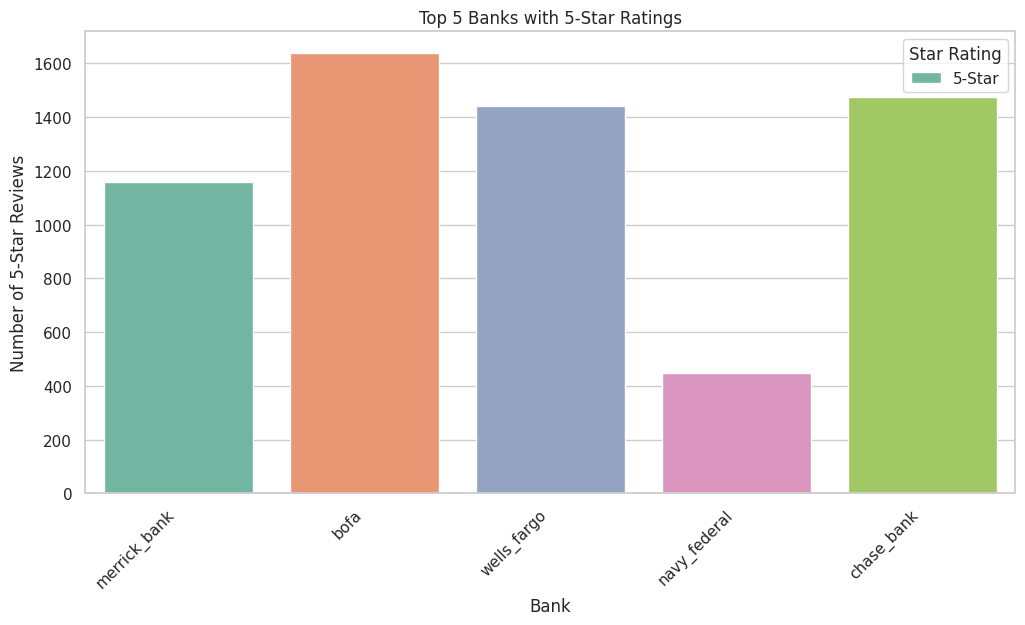

In [24]:
top_5_star_banks = df[df['star'] == 5]['bank'].value_counts().nlargest(5).index

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=df[df['bank'].isin(top_5_star_banks)], x="bank", palette="Set2")
ax.set_title("Top 5 Banks with 5-Star Ratings")
ax.set_xlabel("Bank")
ax.set_ylabel("Number of 5-Star Reviews")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.legend(title='Star Rating', labels=['5-Star'])

plt.show()

### BOTTOM 5 BANKS WITH 1 STARS

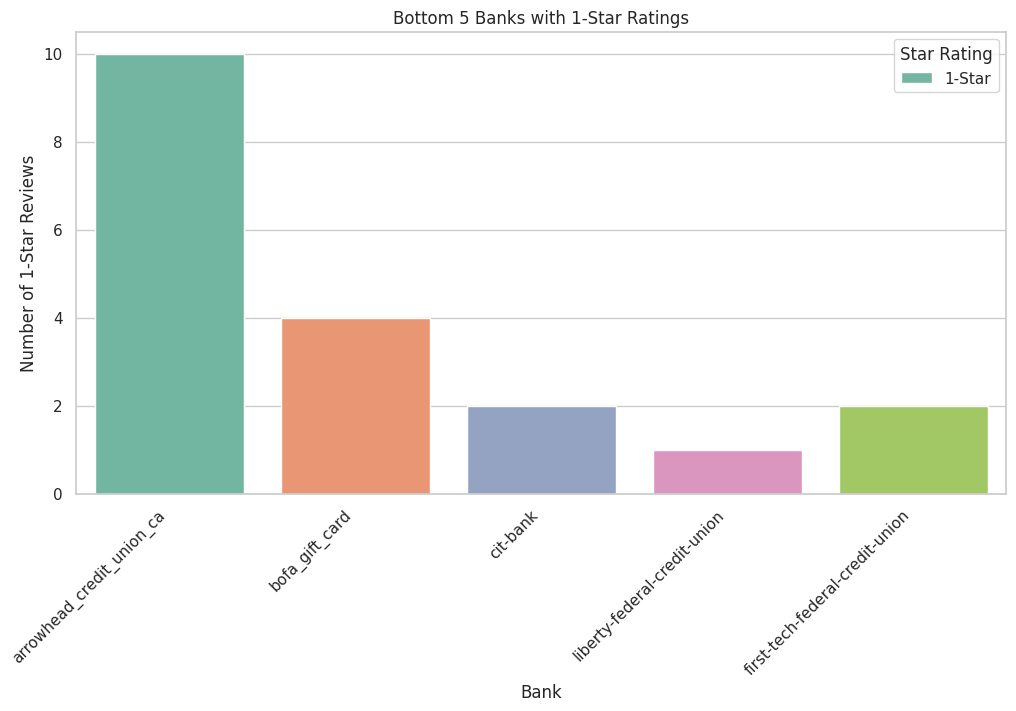

In [25]:
bottom_1_star_banks = df[df['star'] == 1]['bank'].value_counts().nsmallest(5).index

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=df[df['bank'].isin(bottom_1_star_banks)], x="bank", palette="Set2")
ax.set_title("Bottom 5 Banks with 1-Star Ratings")
ax.set_xlabel("Bank")
ax.set_ylabel("Number of 1-Star Reviews")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.legend(title='Star Rating', labels=['1-Star'])

plt.show()

#
#
#
#
#

# What is the average number of likes for each star rating?

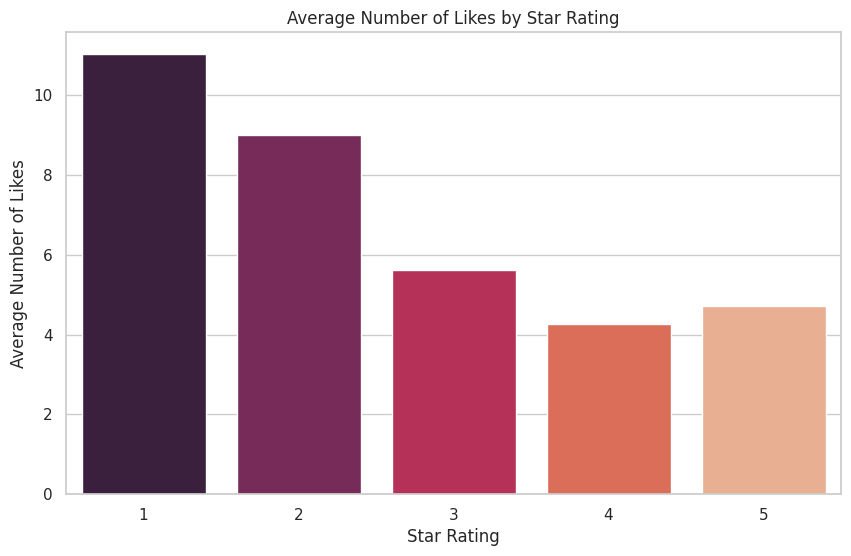

In [26]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(data=df, x="star", y="like", estimator="mean", errorbar=None, palette="rocket")
plt.title("Average Number of Likes by Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Average Number of Likes")

plt.show()

# NLP

In [27]:
df['text'][8]

'I have been a Merrick customer for about a decade now. There has never been a problem, dispute, or even a call to customer service. In this day and age, that is phenomenal. Truly happy with this company and have recommended them to many friends. Thank you for your continuing service.'

In [28]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import re
from wordcloud import WordCloud
import torch

In [29]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# First let's define a function to clean and preprocess text
def clean_and_tokenize(text):
    # Here tokenizing the text using BERT tokenizer
    tokens = tokenizer.tokenize(text)

    # This converts tokens back to text
    cleaned_text = " ".join(tokens)

    # This removes special characters and punctuation
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)

    # This converts text to lowercase
    cleaned_text = cleaned_text.lower()

    return cleaned_text

In [30]:
example_text = "I have been a Merrick customer for about a decade now. There has never been a problem, dispute, or even a call to customer service. In this day and age, that is phenomenal. Truly happy with this company and have recommended them to many friends. Thank you for your continuing service."

cleaned_text = clean_and_tokenize(example_text)
print(cleaned_text)

i have been a mer rick customer for about a decade now  there has never been a problem  dispute  or even a call to customer service  in this day and age  that is phenomena l  truly happy with this company and have recommended them to many friends  thank you for your continuing service 


#
#
#
#
#

# WORD CLOUD

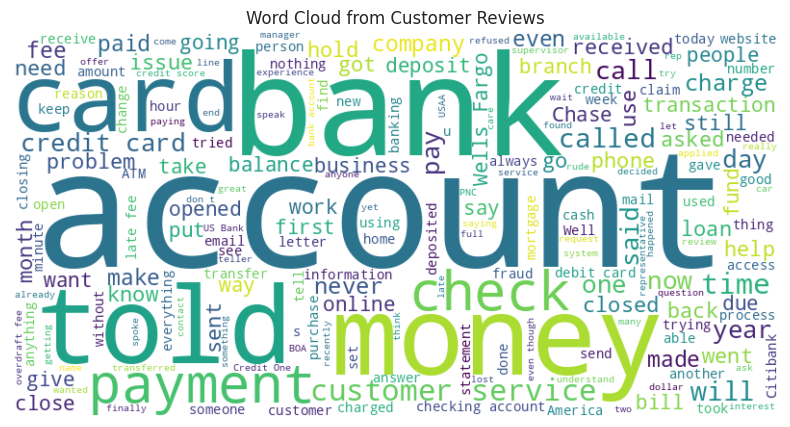

In [31]:
all_cleaned_text = " ".join(df['text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_cleaned_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Customer Reviews")
plt.show()

#
#
#
#
#
#
#
#

# Sentiments

In [32]:
def get_sentiment(star):
    if star >= 3:
        return 1  # Positive sentiment
    else:
        return 0  # Negative sentiment

# Creating new column 'sentiment'
df['sentiment'] = df['star'].apply(get_sentiment)

df[['bank', 'star', 'sentiment']]

,bank,star,sentiment
0,merrick_bank,5,1
1,merrick_bank,5,1
2,merrick_bank,4,1
3,merrick_bank,5,1
4,merrick_bank,5,1
...,...,...,...
19266,tcf_bank,1,0
19267,tcf_bank,1,0
19268,tcf_bank,1,0
19269,tcf_bank,1,0


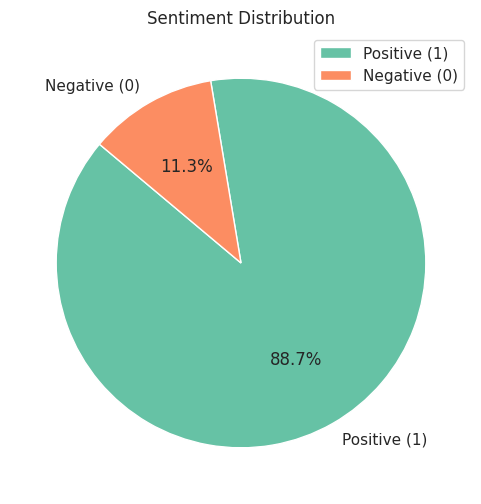

In [33]:
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
colors = sns.color_palette("Set2")
plt.pie(sentiment_counts, labels=['Positive (1)', 'Negative (0)'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution")
plt.legend(['Positive (1)', 'Negative (0)'], loc='upper right')

plt.show()

##           Thank you